# Probability & Information Theory

http://egrcc.github.io/docs/dl/deeplearningbook-prob.pdf

In [1]:
import numpy as np
import scipy.stats as st
from math import factorial

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^NSEI'

start = '2020-01-01'
end = '2023-01-01'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [3]:
dataset['Returns'] = dataset['Adj Close'].pct_change() 

In [4]:
dataset['Returns'] = dataset['Adj Close'].dropna()

In [5]:
Returns = np.array(dataset['Returns'])
Open = np.array(dataset['Open'])
Close = np.array(dataset['Adj Close'])
High = np.array(dataset['High'])
Low = np.array(dataset['Low'])

# 52 Cards in a Set

#### There are 13 cards of each suit, consisting of 1 Ace, 3 face cards, and 9 number cards. There are 4 Aces, 12 face cards, and 36 number cards in a 52 card deck. The number of spades, hearts, diamonds, and clubs is same in every pack of 52 cards.

In [6]:
# Number of cards
cards = 52 
# Outcomes (Number of Aces)
aces = 4
# Divide possible outcomes by the Number of Cards 
ace_probability = aces / cards
# Print probability rounded to two decimal places
ace_probability_percent = ace_probability * 100
print(str(round(ace_probability_percent, 0)) + '%')

8.0%


## Apply Stock data to probability

In [7]:
import collections

print([item for item, count in collections.Counter(Close).items() if count > 1])


[10607.349609375, 14617.849609375, 17213.599609375]


In [8]:
def event_probability(event_outcomes, sample_space):
    probability = (event_outcomes / sample_space) * 100
    return round(probability, 1)

In [9]:
# Sample Space
stock_data = len(Close)

# Determine the probability of drawing a particular number
lowest = 45.47999954223633
lowest_probability = event_probability(lowest,stock_data)

# Determine the probability of drawing a particular number
middle = 81.83999633789062
middle_probability = event_probability(middle, stock_data)

# Determine the probability of drawing a particular number
highest = 106.1500015258789
highest_probability = event_probability(highest, stock_data)

# Print each probability
print(str(lowest_probability) + '%')
print(str(middle_probability) + '%')
print(str(highest_probability) + '%')

6.1%
11.0%
14.2%


In [10]:
# Sample Space
stock_data = len(Close)

# Outcomes
lowest = 45.47999954223633
highest = 106.1500015258789

# Probability of one red
lowest_probability = lowest / stock_data
highest_probability = highest / stock_data
lowest_highest = lowest_probability * highest_probability

# Lowest and Highest Probability Percent Code
lowest_highest_probability_percent = lowest_highest * 100
print(round(lowest_highest_probability_percent, 1))



0.9


In [11]:
lowest_probability

0.06096514683945888

In [12]:
highest_probability

0.14229222724648646

### Flip coins Probability

https://www.fourmilab.ch/rpkp/experiments/statistics.html

In [13]:
n = len(Close) 
get_sum = sum(Close) 
mean = get_sum / n 
print('Average:', mean)

Average: 14798.596445364863


In [14]:
Close.sort() 
if n % 2 == 0: 
    median1 = Close[n//2] 
    median2 = Close[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = Close[n//2] 
print('Median:', median)

Median: 15725.05029296875


In [15]:

from collections import Counter 

data = Counter(Close) 
get_mode = dict(data) 
for k,v in get_mode.items():
    if v==max(list(data.values())):
        mode = k
print('Mode:', mode)      



Mode: 17213.599609375


In [16]:
minimum = min(Close)
maximum = max(Close)
range_numbers = maximum - minimum
print('Range Number:', range_numbers)

Range Number: 11202.25


In [17]:
variance= np.var(Close)
print('Variance:', variance)

Variance: 8389480.029703435


In [18]:
std = np.sqrt(variance)
print('Standard Deviation:', std)

Standard Deviation: 2896.459913360348


In [19]:
# Common Stock Number

num = np.array([53.79999923706055, 45.47999954223633, 52.38999938964844, 53.189998626708984, 56.38999938964844, 85.30999755859375, 86.70999908447266, 81.83999633789062, 82.41999816894531, 81.08999633789062, 82.54000091552734, 78.05999755859375, 81.55999755859375, 81.3499984741211, 81.43000030517578, 92.66000366210938, 79.05999755859375, 82.76000213623047, 78.55000305175781, 106.1500015258789])

In [20]:
heads_count = [np.random.binomial(n, 0.5) for n in num]
heads_count

[32,
 29,
 27,
 32,
 29,
 40,
 47,
 39,
 37,
 42,
 41,
 41,
 43,
 43,
 34,
 43,
 41,
 38,
 37,
 45]

In [21]:
proportion_heads = heads_count/num
proportion_heads

array([0.59479555, 0.63764293, 0.51536553, 0.60161686, 0.51427559,
       0.46887822, 0.54203668, 0.47653961, 0.44892017, 0.51794305,
       0.49672885, 0.52523701, 0.52721924, 0.52858022, 0.41753653,
       0.46406214, 0.51859349, 0.459159  , 0.47103754, 0.4239284 ])

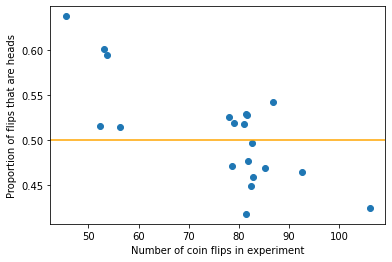

In [22]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
_ = ax.scatter(num, proportion_heads)

In [23]:
n_experiments = 30 # times with stock data
stock_count = np.random.binomial(max(Close), 0.5, n_experiments)

In [24]:
stocks, event_count = np.unique(stock_count, return_counts=True)

In [25]:
stocks

array([9105, 9218, 9259, 9285, 9304, 9315, 9331, 9354, 9355, 9365, 9366,
       9367, 9372, 9379, 9383, 9385, 9387, 9394, 9405, 9409, 9412, 9415,
       9427, 9432, 9443, 9451, 9460, 9467, 9470, 9471])

In [26]:
event_count

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [27]:
event_proba = event_count/n_experiments
event_proba



array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

Text(0.5, 1.0, 'Number of probability')

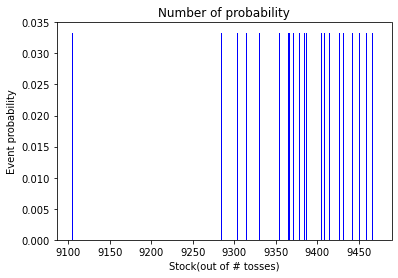

In [28]:
plt.bar(stocks, event_proba, color='blue')
plt.xlabel('Stock(out of # tosses)')
plt.ylabel('Event probability')
plt.title('Number of probability')

In [29]:
x = st.skewnorm.rvs(Close, size=len(Close)) 

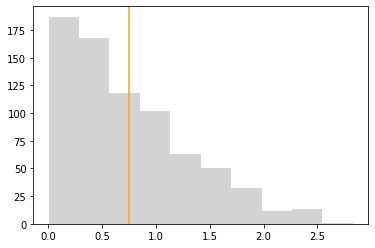

In [30]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

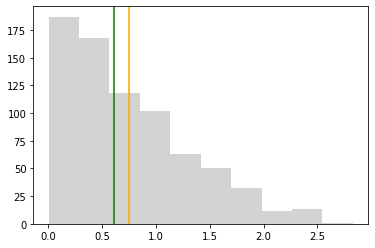

In [31]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')



### Quantiles

In [32]:
np.median(x)



0.6050245017069569

In [33]:
np.quantile(x, 0.5)


0.6050245017069569

### Percentiles

In [34]:
p = np.percentile(x, [95, 99])
p

array([1.85235806, 2.4027762 ])

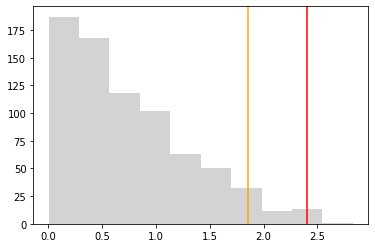

In [35]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
_ = plt.hist(x, color = 'lightgray')

In [36]:
np.quantile(x, [.95, .99])

array([1.85235806, 2.4027762 ])

In [37]:
q = np.percentile(x, [25, 50, 75])
q

array([0.28280268, 0.6050245 , 1.09111656])

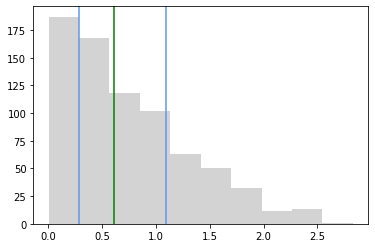

In [38]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
_ = plt.hist(x, color = 'lightgray')

In [39]:
### Deciles

In [40]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.10647712, 0.20974885, 0.36227471, 0.49277993, 0.6050245 ,
       0.78377975, 0.9852329 , 1.25055498, 1.60985128])

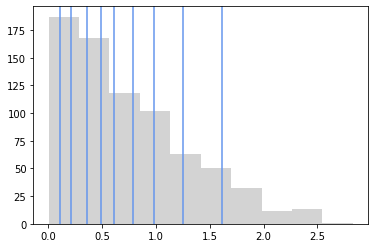

In [41]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
_ = plt.hist(x, color = 'lightgray')


### Box-and-Whisker Plot

<Axes: >

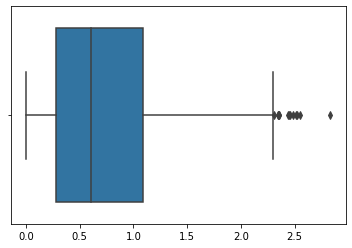

In [42]:
sns.boxplot(x=x)

### Box edges and median are determined by quartiles

In [43]:
# Box edges define the inter-quartile range (IQR)
r = max(q) - min(q)
r

0.8083138788774437

In [44]:
# 1.5 x IQR
min(q) - 1.5*r

-0.9296681337652469

In [45]:
# whisker is plotted where that lowest value
np.min(x)

0.0008629406251044543

In [46]:
# upper whisker 
max(q) + 1.5*r

2.303587381744528

In [47]:
# outliers and are plotted as individual points
x.sort()
x[-15:]

array([2.26065124, 2.29462311, 2.31089026, 2.3434797 , 2.34473597,
       2.3510107 , 2.35620619, 2.44087893, 2.4482764 , 2.45604565,
       2.48700155, 2.51622174, 2.52016384, 2.54789709, 2.83095528])

### Measures of Dispersion

In [48]:
xbar = np.mean(x)
xbar

0.7478693110607595

In [49]:
squared_differences = [(x_i - xbar)**2 for x_i in x]

In [50]:
squared_differences[0:10]

[0.558018517471451,
 0.5575379507460356,
 0.5567840532884054,
 0.5554340452109919,
 0.553520777585278,
 0.550097760406014,
 0.5474191851102421,
 0.5464606851068736,
 0.5457734578380379,
 0.5451593754473625]

In [51]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.33250419786745755

In [52]:
np.var(x)

0.33250419786745744

In [53]:
sigma = sigma_squared**(1/2)
sigma

0.5766317697347741

In [54]:
np.std(x)

0.576631769734774

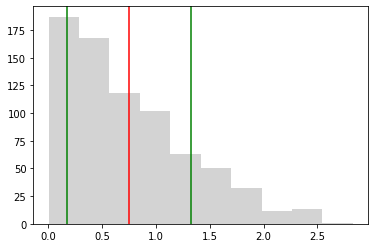

In [55]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='red')
plt.axvline(x = xbar+sigma, color='green')
plt.axvline(x = xbar-sigma, color='green')
_ = plt.hist(x, color = 'lightgray')

In [56]:
sigma/(len(x))**(1/2)

0.02111198908043126

In [57]:
# defaults to 1 degree of freedom (n-1), which can be ignored with the larger data sets of Machine Learning
st.sem(x)

0.021126153449069568

In [58]:
# 0 degrees of freedom (n)
st.sem(x, ddof=0) 

0.021111989080431257

### The Central Limit Theorem

In [59]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample



array([0.38891482, 0.49852406, 0.37087869, 1.13531597, 0.73142525,
       0.04498898, 0.29325653, 2.26065124, 0.80155022, 1.52547224])

In [60]:
np.mean(x_sample)



0.805097799494028

In [61]:
# sampling distributions of 

def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means



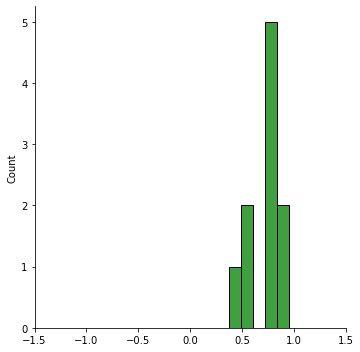

In [62]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

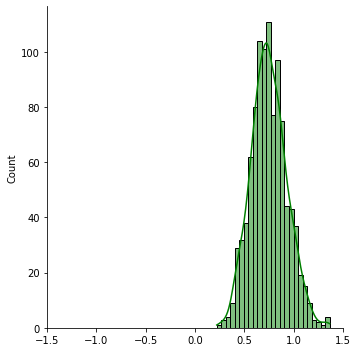

In [63]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

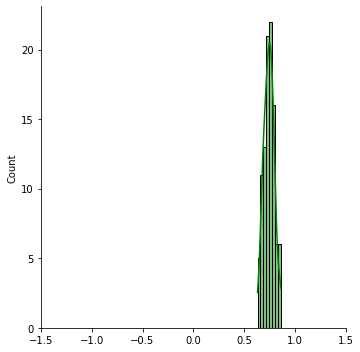

In [64]:
sns.displot(sample_mean_calculator(x, 100, 100), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

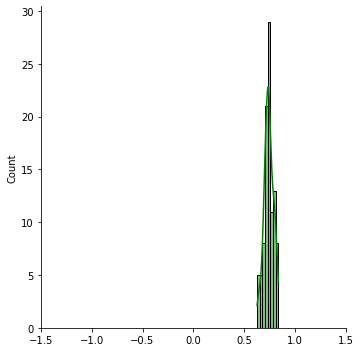

In [65]:
sns.displot(sample_mean_calculator(x, 100, 100), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)